In [1]:
import tensorflow as tf
print(tf.__version__)

2.12.0


In [2]:
# load required libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np


In [3]:
# Load in the data
from sklearn.datasets import load_breast_cancer

In [4]:
# load the data
data = load_breast_cancer()

In [5]:
# check the type of 'data'
type(data)

sklearn.utils._bunch.Bunch

So ,it is a Bunch object, this basically acts like a dictionary where you can treat the keys like attributes.

In [6]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [7]:
# 'data' (the attribute) means the input data
data.data.shape
# it has 569 samples, 30 features

(569, 30)

In [8]:
# 'targets'
data.target
# note how the targets are just 0s and 1s
# normally, when you have K targets, they are labeled 0..K-1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [9]:
# their meaning is not lost
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [10]:
# there are also 569 corresponding targets
data.target.shape

(569,)

In [11]:
# We can also determine the meaning of each feature
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [12]:
# split the data into train and test sets
# this lets us simulate how our model will perform in the future
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.33)
N, D = X_train.shape

# Standardization

The basic concept behind the standardization function is to make data points centred about the mean of all the data points presented in a feature with a unit standard deviation. This means the mean of the data point will be zero and the standard deviation will be 1.

In statistics, the mean is the average value of all the numbers presented in a set of numbers and the standard deviation is a measurement of the dispersion of the data points from the mean value of the data points.  

So in standardization, the data points are rescaled by ensuring that after scaling they will be in a curve shape. 

Mathematically we can represent it as follow

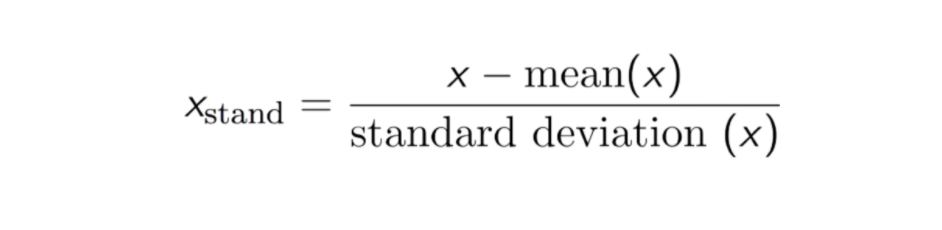


In [13]:
# Scale the data

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Tensorflow Sequential

Tensorflow sequential is the group containing the stack of linear format that consists of various layers of the library package tf.keras.Model

This model consists of various layers; every layer is worked upon individually while creating the model.

The methodology followed while building the model is step-by-step and working on a single layer at a particular time. The Sequential tensorflow API is the easiest way using which we can run and create the Keras models. 


*   syntax of the Sequential API method of the Model 

Tensorflow.keras.Sequential(layers = None, name = None)



In [14]:
# Build the model with Tensorflow

model = tf.keras.models.Sequential([
  tf.keras.layers.Input(shape=(D,)),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# Alternatively, we can do:
# model = tf.keras.models.Sequential()
# model.add(tf.keras.layers.Dense(1, input_shape=(D,), activation='sigmoid'))

# compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


# Train the model
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)


# Evaluate the model - evaluate() returns loss and accuracy
print("Train score:", model.evaluate(X_train, y_train))
print("Test score:", model.evaluate(X_test, y_test))

Epoch 1/100
12/12 [==============================] - 2s 58ms/step - loss: 0.4462 - accuracy: 0.7927 - val_loss: 0.4164 - val_accuracy: 0.8298
Epoch 2/100
12/12 [==============================] - 0s 9ms/step - loss: 0.4161 - accuracy: 0.8031 - val_loss: 0.3922 - val_accuracy: 0.8351
Epoch 3/100
12/12 [==============================] - 0s 12ms/step - loss: 0.3906 - accuracy: 0.8215 - val_loss: 0.3702 - val_accuracy: 0.8457
Epoch 4/100
12/12 [==============================] - 0s 10ms/step - loss: 0.3671 - accuracy: 0.8478 - val_loss: 0.3506 - val_accuracy: 0.8617
Epoch 5/100
12/12 [==============================] - 0s 11ms/step - loss: 0.3459 - accuracy: 0.8714 - val_loss: 0.3336 - val_accuracy: 0.8723
Epoch 6/100
12/12 [==============================] - 0s 13ms/step - loss: 0.3280 - accuracy: 0.8793 - val_loss: 0.3178 - val_accuracy: 0.8777
Epoch 7/100
12/12 [==============================] - 0s 9ms/step - loss: 0.3119 - accuracy: 0.8793 - val_loss: 0.3035 - val_accuracy: 0.8830
Epoch 8/

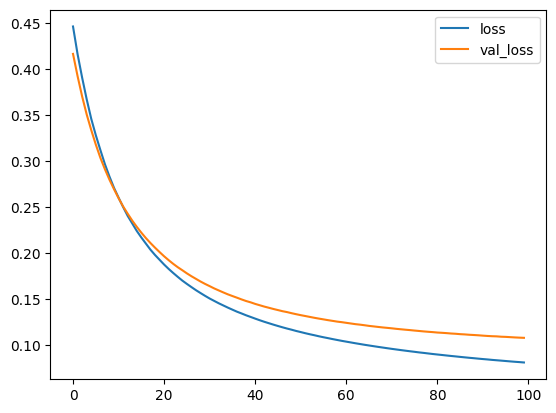

In [15]:
# Plot loss returned by model.fit()
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

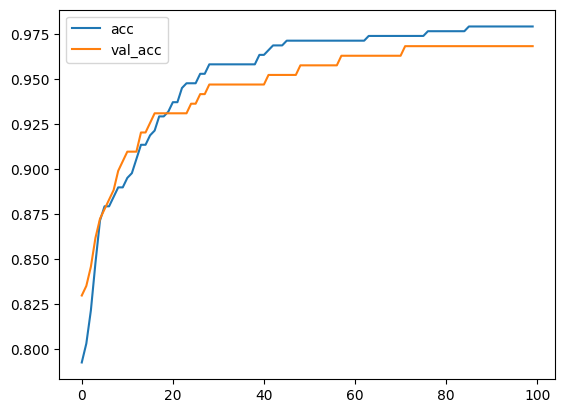

In [16]:
# Plot the accuracy 
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

# Making Predictions

In [17]:
# Make predictions
P = model.predict(X_test)
print(P) # they are outputs of the sigmoid, interpreted as probabilities p(y = 1 | x)

6/6 [==============================] - 0s 3ms/step
[[8.5684299e-01]
 [5.5264082e-02]
 [9.9682832e-01]
 [4.1276714e-01]
 [2.0656545e-02]
 [9.9995798e-01]
 [2.9239224e-02]
 [1.7611077e-04]
 [9.9048501e-01]
 [9.9651957e-01]
 [5.1540015e-03]
 [8.5510248e-05]
 [5.6759846e-01]
 [9.8393744e-01]
 [1.8816110e-04]
 [1.6063623e-02]
 [9.9980319e-01]
 [9.9508947e-01]
 [9.9852097e-01]
 [1.4393166e-05]
 [9.9730641e-01]
 [1.0615985e-04]
 [1.9186378e-01]
 [1.0023276e-05]
 [9.5312691e-01]
 [8.3619272e-09]
 [2.1980434e-04]
 [1.2969458e-01]
 [7.6571387e-01]
 [9.9984044e-01]
 [6.7233173e-03]
 [9.7266102e-01]
 [9.6571875e-01]
 [9.7429240e-01]
 [2.1584723e-02]
 [9.9488699e-01]
 [4.7945208e-03]
 [9.9087238e-01]
 [6.5514410e-05]
 [2.2702258e-04]
 [1.5132711e-02]
 [1.8245962e-02]
 [7.5207222e-01]
 [8.2356719e-06]
 [9.1970760e-06]
 [6.2905157e-05]
 [8.1730366e-01]
 [9.9052185e-01]
 [9.4108236e-01]
 [9.9792522e-01]
 [1.7347103e-05]
 [9.8116136e-01]
 [4.8969660e-02]
 [9.8236686e-01]
 [8.8423902e-01]
 [9.8802668e-0

In [18]:
# Round to get the actual predictions
# Note: has to be flattened since the targets are size (N,) while the predictions are size (N,1)
P = np.round(P).flatten()
print(P)


[1. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0.
 1. 0. 0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1.
 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0.
 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1.
 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0.
 0. 0. 0. 1. 0. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1.
 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1.]


In [19]:
# Calculate the accuracy, compare it to evaluate() output
print("Manually calculated accuracy:", np.mean(P == y_test))
print("Evaluate output:", model.evaluate(X_test, y_test))

Manually calculated accuracy: 0.9680851063829787
6/6 [==============================] - 0s 4ms/step - loss: 0.1076 - accuracy: 0.9681
Evaluate output: [0.10758146643638611, 0.9680851101875305]


# Saving and Loading a Model

In [20]:
# Let's now save our model to a file
model.save('linearclassifier.h5')

In [21]:
# Check that the model file exists
!ls -lh 

total 24K
-rw-r--r-- 1 root root  20K Jun  7 16:52 linearclassifier.h5
drwxr-xr-x 1 root root 4.0K Jun  6 13:37 sample_data


In [22]:
# Let's load the model and confirm that it still works

model = tf.keras.models.load_model('linearclassifier.h5')
print(model.layers)
model.evaluate(X_test, y_test)

6/6 [==============================] - 0s 4ms/step - loss: 0.1076 - accuracy: 0.9681


[0.10758146643638611, 0.9680851101875305]

In [23]:
# Download the file - 
# from google.colab import files
# files.download('linearclassifier.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>